In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df1 = pd.read_csv("../Data/Day1-6 pattern/day_1_data.csv")
df2 = pd.read_csv("../Data/Day1-6 pattern/day_2_data.csv")
df3 = pd.read_csv("../Data/Day1-6 pattern/day_3_data.csv")
df4 = pd.read_csv("../Data/Day1-6 pattern/day_4_data.csv")
df5 = pd.read_csv("../Data/Day1-6 pattern/day_5_data.csv")
df6 = pd.read_csv("../Data/Day1-6 pattern/day_6_data.csv")

In [4]:
# Combine df
dfs = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# Extract time features
dfs['Time'] = pd.to_timedelta(dfs['Time'])
dfs['Hour'] = dfs['Time'].dt.total_seconds() / 3600.0


In [5]:

bins = [0, 300, 800, 4000, 18000]
labels = ['0-300', '301-800', '801-4000', '4001-18000']

dfs['Length_Range'] = pd.cut(dfs['Length'], bins=bins, labels=labels)

In [6]:
label_encoder = LabelEncoder()
dfs['IP Address'] = label_encoder.fit_transform(dfs['IP Address'])  

# Define features and target
X = dfs[['Hour', 'IP Address']]  
y_class = dfs[['Length_Range']]  
    

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [150]:
dfs.tail()

,Time,Device,IP Address,Length,Hour,Length_Range
51014,0 days 22:59:51,Laptop,3,269,22.997500,0-300
51015,0 days 22:59:52,iphone,1,3044,22.997778,801-4000
51016,0 days 22:59:57,Laptop,3,215,22.999167,0-300
51017,0 days 22:59:58,Laptop,3,271,22.999444,0-300
51018,0 days 22:59:59,iphone,1,903,22.999722,801-4000


**Classification**

Random Forest Classifier

In [7]:
# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the models
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

       0-300       1.00      1.00      1.00      2605
     301-800       0.19      0.15      0.17       260
    801-4000       0.97      0.98      0.97      7339

    accuracy                           0.96     10204
   macro avg       0.72      0.71      0.71     10204
weighted avg       0.96      0.96      0.96     10204

[[2605    0    0]
 [   0   38  222]
 [   0  158 7181]]


SVM 

In [8]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

              precision    recall  f1-score   support

       0-300       1.00      1.00      1.00      2605
     301-800       0.00      0.00      0.00       260
    801-4000       0.97      1.00      0.98      7339

    accuracy                           0.97     10204
   macro avg       0.66      0.67      0.66     10204
weighted avg       0.95      0.97      0.96     10204

[[2605    0    0]
 [   0    0  260]
 [   0    0 7339]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Logistic Regression

In [9]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(multi_class='ovr')  # 'ovr' for One-vs-Rest strategy
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

              precision    recall  f1-score   support

       0-300       1.00      1.00      1.00      2605
     301-800       0.00      0.00      0.00       260
    801-4000       0.97      1.00      0.98      7339

    accuracy                           0.97     10204
   macro avg       0.66      0.67      0.66     10204
weighted avg       0.95      0.97      0.96     10204

[[2605    0    0]
 [   0    0  260]
 [   0    0 7339]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

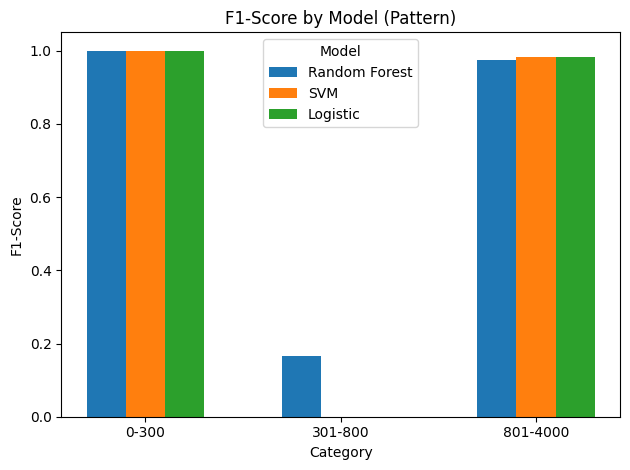

In [10]:


# Assuming report_rf, report_svm, report_lr are dictionaries with F1 scores for models
# Example structure: {'0-300': {'f1-score': 0.9}, '301-800': {'f1-score': 0.8}, ...}

categories = ['0-300', '301-800', '801-4000']
f1_scores_by_model = {'Random Forest': [], 'SVM': [], 'Logistic': []}

# Fill the scores for each model
for category in categories:
    f1_scores_by_model['Random Forest'].append(report_rf[category]['f1-score'])
    f1_scores_by_model['SVM'].append(report_svm[category]['f1-score'])
    f1_scores_by_model['Logistic'].append(report_lr[category]['f1-score'])

# Number of groups and bar width
n_groups = len(categories)
bar_width = 0.2

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)

# Plotting each set of bars for each model
for i, (model_name, scores) in enumerate(f1_scores_by_model.items()):
    ax.bar(index + i * bar_width, scores, bar_width, label=model_name)

# Set labels, title, and ticks
ax.set_xlabel('Category')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score by Model (Pattern)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories)

# Add legend
ax.legend(title="Model")

# Other plot settings
plt.tight_layout()
plt.show()


**NS3 Simulation Results**

In [178]:
df_p = pd.read_csv("../Data/NS3 Data/pattern.csv") #5:52pm - 6:07pm   6:00pm - 6:07pm
df_pa = pd.read_csv("../Data/NS3 Data/pattern_alloc.csv") 

No Allocation Latency

In [179]:
df_p['Time'] = pd.to_timedelta(df_p['Time'], unit='s')
df_p['Time'] += pd.Timedelta(hours=17, minutes=52)
df_p['Hour'] = df_p['Time'].dt.total_seconds() / 3600.0

In [180]:
df_p.head()

,No.,Time,Source,Destination,Protocol,Length,Data rate (Mb/s),Info,Bandwidth,Hour
0,1,0 days 17:52:00,00:00:00_00:00:03,Broadcast,802.11,60,NaN,"Beacon frame, SN=0, FN=0, Flags=........, BI=1...",60,17.866667
1,2,0 days 17:52:00.101427,00:00:00_00:00:05,00:00:00_00:00:03,802.11,49,NaN,"Association Request, SN=0, FN=0, Flags=..........",49,17.866695
2,3,0 days 17:52:00.102713,00:00:00_00:00:03,Broadcast,802.11,60,NaN,"Beacon frame, SN=1, FN=0, Flags=........, BI=1...",60,17.866695
3,4,0 days 17:52:00.102963,00:00:00_00:00:05,00:00:00_00:00:03,802.11,49,NaN,"Association Request, SN=0, FN=0, Flags=....R.....",49,17.866695
4,5,0 days 17:52:00.103861,NaN,00:00:00_00:00:05 (00:00:00:00:00:05) (RA),802.11,14,NaN,"Acknowledgement, Flags=........",14,17.866696


In [181]:
info1 = ['49153  >  9 Len=1024', '9  >  49153 Len=1024']
info2 = ['49153  >  9 Len=2048', '9  >  49153 Len=2048']
df_lat1 = df_p[(df_p['Info'].isin(info1))]
df_lat2 = df_p[(df_p['Info'].isin(info2))]
timestamp1 = list(df_lat1['Hour'])
timestamp2 = list(df_lat2['Hour'])

In [182]:
latency1 = timestamp1[1] - timestamp1[0]
latency2 = timestamp2[1] - timestamp2[0]
latency1 = abs(latency1)*3600
latency2 = abs(latency2)*3600

In [183]:
print(latency1)
print('\n')
print(latency2)

0.012706000002538076


0.004754000009654646


With Allocation Latency

In [184]:
df_pa['Time'] = pd.to_timedelta(df_pa['Time'], unit='s')
df_pa['Time'] += pd.Timedelta(hours=17, minutes=52)
df_pa['Hour'] = df_pa['Time'].dt.total_seconds() / 3600.0

In [185]:
df_lata1 = df_pa[(df_pa['Info'].isin(info1))]
df_lata2 = df_pa[(df_pa['Info'].isin(info2))]
timestampa1 = list(df_lata1['Hour'])
timestampa2 = list(df_lata2['Hour'])

In [186]:
latencya1 = timestampa1[1] - timestampa1[0]
latencya2 = timestampa2[1] - timestampa2[0]
latencya1 = abs(latencya1)*3600
latencya2 = abs(latencya2)*3600

In [187]:
print(latencya1)
print('\n')
print(latencya2)

0.005055000002585075


0.004304000010790787


ML Predcition From Given Device & Time 

In [138]:
df_pa = pd.read_csv("../Data/NS3 Data/pattern_alloc.csv") 
df_pa['Time'] = pd.to_timedelta(df_pa['Time'], unit='s')
df_pa['Time'] += pd.Timedelta(hours=17, minutes=52)
df_pa['Hour'] = df_pa['Time'].dt.total_seconds() / 3600.0

In [141]:
df_pa.head()

,No.,Time,Source,Destination,Protocol,Length,Data rate (Mb/s),Info,Bandwidth,Hour
0,1,0 days 17:52:00,00:00:00_00:00:03,Broadcast,802.11,60,NaN,"Beacon frame, SN=0, FN=0, Flags=........, BI=1...",60,17.866667
1,2,0 days 17:52:00.101427,00:00:00_00:00:05,00:00:00_00:00:03,802.11,49,NaN,"Association Request, SN=0, FN=0, Flags=..........",49,17.866695
2,3,0 days 17:52:00.102713,00:00:00_00:00:03,Broadcast,802.11,60,NaN,"Beacon frame, SN=1, FN=0, Flags=........, BI=1...",60,17.866695
3,4,0 days 17:52:00.102963,00:00:00_00:00:05,00:00:00_00:00:03,802.11,49,NaN,"Association Request, SN=0, FN=0, Flags=....R.....",49,17.866695
4,5,0 days 17:52:00.103861,NaN,00:00:00_00:00:05 (00:00:00:00:00:05) (RA),802.11,14,NaN,"Acknowledgement, Flags=........",14,17.866696


In [144]:
ip_addresses = ['192.168.239.5', '192.168.239.4']
df_pa = df_pa[(df_pa['Destination'].isin(ip_addresses))]

In [148]:
df_pa_c = pd.DataFrame(columns=['Hour','IP Address','Length'])
df_pa_c['IP Address'] = df_pa['Destination']
df_pa_c['Hour'] = df_pa['Hour']
df_pa_c['Length'] = df_pa['Length']


In [153]:
bins = [0, 300, 800, 4000, 18000]
labels = ['0-300', '301-800', '801-4000', '4001-18000']

df_pa_c['Length_Range'] = pd.cut(df_pa_c['Length'], bins=bins, labels=labels)
df_pa_c['IP Address'] = df_pa_c['IP Address'].replace({'192.168.239.5': 2, '192.168.239.4': 4})

X_val = df_pa_c[['Hour','IP Address']]
y_val = df_pa_c[['Length_Range']]  

In [154]:
y_val_rf = rf_model.predict(X_val)
print(classification_report(y_val, y_val_rf))
print(confusion_matrix(y_val, y_val_rf))
report_val_rf = classification_report(y_val, y_val_rf, output_dict=True)

              precision    recall  f1-score   support

       0-300       0.00      0.00      0.00         0
     301-800       0.00      0.00      0.00         0
    801-4000       1.00      0.59      0.75      1319

    accuracy                           0.59      1319
   macro avg       0.33      0.20      0.25      1319
weighted avg       1.00      0.59      0.75      1319

[[  0   0   0]
 [  0   0   0]
 [420 115 784]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo